# Libraries

Here we import the libraries necessery for workng with the textual data of creature cards

In [1]:
# Importing Pandas for DataFrame
import pandas as pd

# Importing Numpy for Arrays
import numpy as np

# Importing Altair for Visualization
import altair as alt

# Importing Missingno for Null values 
import missingno as msng

# Importing dastext language detection model
import fasttext

# Importiing library for working with strings
import string

# Setting Random Seed
np.random.seed(1)

C:\Users\minom\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Functions

Here we store the function used and created during the data cleaning and analysis process.

In [2]:
# Function for removing symbols from text string
def remove_symbols(text):
    
    '''This function takes as input a string and
    returns aas output that string without any symbols'''
    
    text = text.lower()
    
    # Create a translation table mapping symbols to None
    translation_table = str.maketrans("", "", string.punctuation)
    
    # Apply the translation table to remove symbols
    text_without_symbols = text.translate(translation_table)
    
    return text_without_symbols




# Function for sorting list of strings
def sort_strings(strings):
    
    '''This function takes as input a list of strings and
    returns that list sorted by lenght and alphabetical order.'''
   
    # Sort by length
    strings.sort(key=len) 
    
    # Sort alphabetically
    sorted_strings = sorted(strings)  
    
    
    return sorted_strings



# Fucntion for decoding sentiments of Dataset
def sentiment_decoding(value):
    
    '''This function takes as input a value of x,
    r,v or o and returns their sentiment encoding.'''
    
    
    # Clause if v is given
    if value == 'v':
        
        # Assining Positive Encoding to sentiment valiable
        sentiment = 'Positive'
        
    # Clause if r is given
    elif value == 'r':
        
        # Assining Mild Encoding to sentiment valiable
        sentiment = 'Mild'
        
    # Clause if x is given
    elif value == 'x':
        
        # Assining Negative Encoding to sentiment valiable
        sentiment = 'Negative'
        
    # Clause if o is given
    else:
        
        # Assining No Opinion Encoding to sentiment valiable
        sentiment = 'No Opinion'
        
    return sentiment



# Function to detect the language of a text
def detect_language(text):
    
    '''This function uses the fast text language
    model to detext the language of a gien piece of text
    and it returns the language code for the text'''
    
    # Predicting mdoel language
    result = model.predict(text, k=1)
    
    # Obtaining language code
    language_code = result[0][0].split("__label__")[1]
    
    
    return language_code


# Function that sumarises numeric value properties for dataframe
def Summary_Numeric(df):

    '''Given a dataframe, this function returns the minimum
    maximum, mean, meadian and unique values for numeric
    columns, and another dataframe containing the counts
    of unique values for each column'''

    # Creating dataframe for summarised values
    summary = pd.DataFrame()

    # Creating dataframe for counts for unique values
    value_counts = pd.DataFrame()

    # List that will hold unique counts
    counts= []

    # List that will hold maxes
    maxes= []

    # List that will hold minimums
    minimums= []

    # List that will hold means
    means= []

    # List that will hold minimums
    medians= []

    # List that will hold uniques
    uniques= []

    # List that will hold standard deviations
    stds= []

    # Loop that iterates through columns in dataframe
    for column in df:

        # Appending current column sumarry values to lists
        counts.append(df.groupby(column)[column].count())
        maxes.append(df[column].max())
        minimums.append(df[column].min())
        means.append(df[column].mean())
        medians.append(df[column].median())
        uniques.append(df[column].unique())
        stds.append(df[column].std())

    #Creating SUmmaru dataframe columsn
    summary['Columns']= list(df.columns)
    summary['Means']= means
    summary['Maxes']= maxes
    summary['Minimums']= minimums
    summary['Medians']= medians
    summary['Unique_Values']= uniques
    summary['Unique_Count'] = list(map(lambda x: len(x),uniques))
    summary['Standard_Devitation']= stds

    # Creating value counts dataframe columns
    value_counts['Columns']= list(df.columns)
    value_counts['Counts']=  counts

    # Returning dataframes
    return summary, value_counts



# Function that sumarises numeric value properties for dataframe
def Summary_Categorical(df):

    '''Given a dataframe, this function returns the amount of
    categories, the most and least frequent categories for categorical
    columns, and another dataframe containing the counts
    of unique values for each column'''

    # Creating dataframe for summarised values
    summary = pd.DataFrame()

    # Creating dataframe for counts for unique values
    value_counts = pd.DataFrame()

    # List that will hold unique counts
    counts= []

    # List that will hold most frequent values
    most_frequent= []

    # List that will hold less frequent value
    least_frequent= []

    # List that will hold most frequent values amount
    val_most= []

    # List that will hold less frequent value amount
    val_least= []

    # List that will amount of categories
    categories= []


    # List that will hold uniques
    uniques= []


    # Loop that iterates through columns in dataframe
    for column in df:

        # Appending current column sumarry values to lists
        counts.append(df.groupby(column)[column].count())
        uniques.append(df[column].unique())
        most_frequent.append(df[column].value_counts().sort_values(
        ascending=False).index[0])
        least_frequent.append(df[column].value_counts().sort_values(
        ascending=True).index[0])
        val_most.append(df[column].value_counts().sort_values(
        ascending=False).values[0])
        val_least.append(df[column].value_counts().sort_values(
        ascending=True).values[0])

    #Creating SUmmaru dataframe columsn
    summary['Columns']= list(df.columns)
    summary['Most_Frequent']= most_frequent
    summary['Most_Value']= val_most
    summary['Least_Frequent']= least_frequent
    summary['Least_Value']= val_least
    summary['Unique_Values']= uniques
    summary['Unique_Count'] =  list(map(lambda x: len(x),uniques))


    # Creating value counts dataframe columns
    value_counts['Columns']= list(df.columns)
    value_counts['Counts']=  counts

    # Returning dataframes
    return summary, value_counts


# Functions for columns with significant amount of True values
def amnt_per_col(df,columns,perct=0.05):

    '''This function takes a sinput a dataframe and a
    list of columns in that dataframe with binary
    values. It returns a list of  columns that have
    a number of True values considered to be significant.'''

    # Column that will hold kept columns
    keeps= []

    # Loop that iterates through given columns
    for i in columns:

        # Clause if Amount of Treu values in colum is greater than
        # indicated significant amount
        if df[i].values.sum() >= float(len(df)*perct):

            # Appending column to kept list
            keeps.append(i)

    # Returning Kept columns
    return keeps


# Data Analysis

In this section we load our initial GlassDoor Reviews Data and use Summary Tools to analyse the numeric and categoric values found within. Similarly we use the missingno library to view the missing values within each column

## Data Loading
We commence by loading  our dataset and displaying and initial view of the dataframe

In [3]:
# Loading GlassDoorReviews Data
df = pd.read_csv('glassdoor_reviews.csv')

# Displaying dataframe
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."


## Data Summaries

Here we analize our data utilizing summary tools in order to determine what type of data we are working with and if the data has any unexpected errors. Firstly, we observe we are worjing with numeric and categoric dat. Afterwards we view the summarized values of the numeric columns in the dataset. We can observe that they are all orrdinal values, ranging from 1 to 5, for rating the different aspects of a job. Some columns have Null values. Following, we observe our categoric columns. While some of the columns have too high of a cardinality to make an analysis upon thhis quick review, we can observe that the date of the review is an object (and thus we need to transfrm the data in this column to be numeric), the sentiment columns dont have any null values and there are some miss inputs in the jobs column that need to be adddressed (as likeley all other inputed text information) as observed form the first entry being an empty character. 

In [4]:
# Observing all data type sin dataframe
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [5]:
# Displaying Summary of Numeric Values of Card Data DF
Summary_Numeric(df.select_dtypes(['float64','int64']))[0]

,Columns,Means,Maxes,Minimums,Medians,Unique_Values,Unique_Count,Standard_Devitation
0,overall_rating,3.655956,5.0,1.0,4.0,"[2, 1, 5, 3, 4]",5,1.174684
1,work_life_balance,3.375735,5.0,1.0,4.0,"[4.0, 3.0, 1.0, 2.0, 5.0, nan]",6,1.305874
2,culture_values,3.590164,5.0,1.0,4.0,"[3.0, 1.0, 2.0, 5.0, 4.0, nan]",6,1.323280
3,diversity_inclusion,3.966612,5.0,1.0,4.0,"[nan, 1.0, 2.0, 4.0, 5.0, 3.0]",6,1.190937
4,career_opp,3.461825,5.0,1.0,4.0,"[2.0, 1.0, 5.0, 4.0, nan, 3.0]",6,1.271295
5,comp_benefits,3.398109,5.0,1.0,3.0,"[3.0, 1.0, 2.0, 4.0, 5.0, nan]",6,1.218738
6,senior_mgmt,3.176576,5.0,1.0,3.0,"[3.0, 4.0, 1.0, 2.0, 5.0, nan]",6,1.330720


In [6]:
# Displaying Summary of Numeric Values of Card Data DF
Summary_Categorical(df.select_dtypes(['object']))[0].head(50)

,Columns,Most_Frequent,Most_Value,Least_Frequent,Least_Value,Unique_Values,Unique_Count
0,firm,IBM,60436,UKCIL,1,"[AFH-Wealth-Management, AJ-Bell, ALDI, AQA, AS...",428
1,date_review,2021-01-13,1761,2021-06-08,1,"[2015-04-05, 2015-12-11, 2016-01-28, 2016-04-1...",4813
2,job_title,Anonymous Employee,162649,Part I Architectural Assistant,1,"[ , Office Administrator, IFA, Anonymous Em...",62275
3,current,Current Employee,209599,KEY NOT FOUND: jobLine.temporary-former,1,"[Current Employee, Current Employee, more than...",29
4,location,"London, England, England",58665,"Wijnegem, Antwerp",1,"[nan, Bromsgrove, England, England, Century Ci...",14488
5,recommend,v,427865,x,176453,"[x, o, v]",3
6,ceo_approv,o,311433,x,63508,"[o, r, x, v]",4
7,outlook,v,301413,x,87657,"[r, x, v, o]",4
8,headline,Good,14300,Safety operations - AVOID,1,"[Young colleagues, poor micro management, Exce...",390456
9,pros,Great company to work for,720,Good work environment.good for career developm...,1,[Very friendly and welcoming to new staff. Eas...,778560


## Null Values

Finnally, we use the missingno library to determine which columns have null values and at which amounts. It is clear to see that the diversity inclusion column has to many null values to be properly included within our dataset; therfore, it will ahve to be removed. The next following column witht he highest number of null values is the "locations" column. Locations is above 60% percent non null data and it is an important column for our purposes of obtaining insights form the dataset, we will have to evaluate the weather it will be kept or requires removal. All other columns have an abovve 70% non null data and so will be kept.

<Axes: >

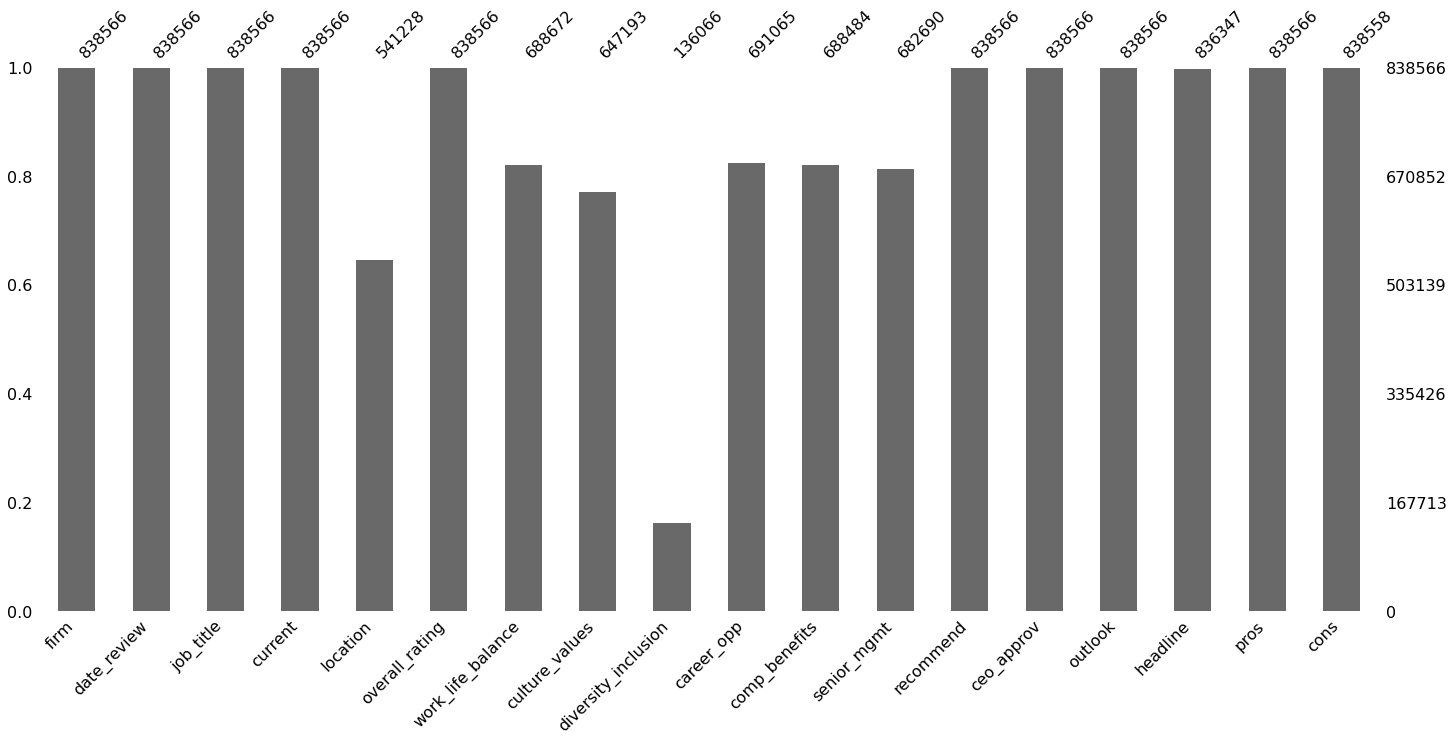

In [7]:
# Displaying Null Values in DF
msng.bar(df)

# Data Engineering

After analysing the data we will now clean the data and transform certain columns into data that better suits our purposes.
First, we begin by dropping the columns that have too many null values. Afterwards, we change the encodings for teh sentiment columns from the "x,o,r,v" encodings into their "Positive, negative, Mild, or No Opinion" values. Following, using the date_review column, we create a columnn for the year inn which the review was written. Finnally, we make sure the job_titles and locations are usable data. We begin this process by using a language model to detect if the job_titles and locations are written in english; we remove the entries that are not in english. We then cleean the strings by removing all symbols and making them lower case. Afterwards, we use another dataset with job titles (similarly cleaned) to corss reference the jobs written in the reviews; we eliminate all that cannot be cross referenced properrly. 

## Imputation

Given our purpose for this data, we willsimply be removing the coluns with to many null values rather than imputate.

In [8]:
# Removing diversity_inclusion column
df = df.drop(['diversity_inclusion'],axis=1)

# Resseting Index
df = df.dropna().reset_index(drop=True)

# Displaying new dataframe
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
1,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
2,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
3,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
4,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441014,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,4.0,2.0,5.0,v,v,v,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage
441015,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,3.0,2.0,3.0,v,r,v,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ..."
441016,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
441017,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations


## Data Decoding

Here we take the sentiment columns and decode them into theirr appropriate encodings.

In [9]:
# Decodingg Reccomend Column
df['recommend'] = list(map(sentiment_decoding, df.recommend.values))

# Decodin Ceo Aprovement Column
df['ceo_approv'] = list(map(sentiment_decoding, df.ceo_approv.values))

# # Decoding Outlook column
df['outlook'] = list(map(sentiment_decoding, df.outlook.values))

# Displaying changed dataset
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,Negative,No Opinion,Mild,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
1,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,Negative,No Opinion,Negative,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
2,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,Negative,No Opinion,Negative,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
3,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,Negative,No Opinion,Mild,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
4,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,5.0,4.0,5.0,Positive,No Opinion,Positive,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441014,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,4.0,2.0,5.0,Positive,Positive,Positive,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage
441015,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,3.0,2.0,3.0,Positive,Mild,Positive,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ..."
441016,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,Positive,Positive,Positive,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
441017,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,Positive,Positive,Positive,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations


## Data Tranformations

Here we transform data time infomration in the date_revie column into a column for the eyar the review was written.

In [10]:
# List of datetimevalues of columns
dates = [df.date_review]

# List of date time column string names
date_columns = ['date_review']

# List of Year values of columns
years = list(map(lambda y: list(map(lambda x: x.split('-')[0], y)),dates))

# Loop that creates new yar month columns
for i,j in enumerate(date_columns):
    df[j +'_Year'] = years[i]

# CHanging Type of year olumn to int64  
df['date_review_Year'] = df['date_review_Year'].astype('int64') 

# Displaying new dataframe
df
    

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,date_review_Year
0,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,Negative,No Opinion,Mild,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,2015
1,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,Negative,No Opinion,Negative,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",2016
2,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,Negative,No Opinion,Negative,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",2016
3,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,Negative,No Opinion,Mild,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...,2016
4,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,5.0,4.0,5.0,Positive,No Opinion,Positive,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441014,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,4.0,2.0,5.0,Positive,Positive,Positive,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage,2021
441015,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,3.0,2.0,3.0,Positive,Mild,Positive,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ...",2021
441016,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,Positive,Positive,Positive,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important....",2021
441017,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,Positive,Positive,Positive,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations,2021


## Data Cleaning

In this section we use a model to detect the english strings in the locations and job_titles columns, we create a column that contains whic language each entry is written in. We eliminate all entries not in english. Following, we remove all symbols and make the strings lowercase. Finally, we cross reference the job_titles entries using a a list of know jobs and eliminate all entries not found in this list.

### English Verification

In [11]:
# Load the pre-trained language identification model
model = fasttext.load_model('lid.176.bin')


# Removing symbols from Job_Title Column entries
df['job_title'] = list(map(remove_symbols,list(df.job_title.values)))

# Removing symbols from Job_Title Column entries
df['location'] = list(map(remove_symbols,list(df.location.values)))

# Removing symbols from Job_Title Column entries
df['firm'] = list(map(remove_symbols,list(df.firm.values)))



# Creating Column for Language Code of Job titles
df['Languages_Firms'] = list(map(detect_language,df.firm.values))

# Creating Column for Language Code of Job titles
df['Languages_Jobs'] = list(map(detect_language,df.job_title.values))

# Creating Column for Language code of Locations
df['Languages_Loc'] = list(map(detect_language,df.location.values))



# Removing Empty or Null string Job Titles
df = df[(df.job_title != ' ') & (df.job_title != 'Null')]

# Removing Non_English Language Encoded Jobs and Locations
df = df[(df.Languages_Jobs == 'en') & (df.Languages_Loc == 'en')  & (df.Languages_Firms == 'en')]

# Displaying Changes
df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,...,recommend,ceo_approv,outlook,headline,pros,cons,date_review_Year,Languages_Firms,Languages_Jobs,Languages_Loc
0,afhwealthmanagement,2015-12-11,office administrator,"Current Employee, more than 1 year",bromsgrove england england,2,3.0,1.0,2.0,1.0,...,Negative,No Opinion,Mild,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,2015,en,en,en
1,afhwealthmanagement,2016-01-28,office administrator,"Current Employee, less than 1 year",bromsgrove england england,1,1.0,1.0,1.0,1.0,...,Negative,No Opinion,Negative,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",2016,en,en,en
2,afhwealthmanagement,2016-04-23,office administrator,"Current Employee, more than 1 year",bromsgrove england england,1,2.0,1.0,2.0,1.0,...,Negative,No Opinion,Negative,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",2016,en,en,en
3,afhwealthmanagement,2016-09-23,ifa,Former Employee,bromsgrove england england,1,1.0,1.0,1.0,1.0,...,Negative,No Opinion,Mild,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...,2016,en,en,en
4,afhwealthmanagement,2016-09-25,anonymous employee,"Current Employee, more than 5 years",century city ca,5,5.0,5.0,5.0,4.0,...,Positive,No Opinion,Positive,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...,2016,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440546,next,2021-06-01,sales assistant,"Former Employee, less than 1 year",liverpool england england,5,5.0,5.0,4.0,5.0,...,Positive,Positive,Mild,Sales,Flexible\r\nGood management \r\nGood starting ...,Understaffing\r\nPoor management\r\nOnly part ...,2021,en,en,en
440547,next,2021-06-02,warehouse worker,"Former Employee, more than 5 years",south elmsall england england,5,5.0,5.0,5.0,5.0,...,Positive,Positive,Positive,Great,"Breaks, food, wage, holidays, Christmas","Flex, hours, guards, trainers, pool",2021,en,en,en
440548,next,2021-06-03,human resources,"Former Employee, more than 3 years",leicester england england,4,4.0,3.0,3.0,4.0,...,Positive,Positive,Positive,Well run business,"Great brand, good discount, nice head office","Disparity between head office, stores & call c...",2021,en,en,en
440549,next,2021-06-03,stockroom assistant,"Former Employee, more than 5 years",fleetwood england england,3,3.0,1.0,1.0,2.0,...,Negative,Mild,Mild,Easy but physically challenging work,Employee discount and generous uniform subsidy,"poor management, no overtime pay",2021,en,en,en


### Loading Cross Reference DataSets

In [12]:
# Loading Wold Cities DataSet for Cross-Referencing with Locations
world_cities = pd.read_csv('worldcities.csv')

# Loading Job Titles text DataSet for Cross-Referencing with ob_titles column
job_titles = pd.read_fwf('job-titles.txt') 

# Display World Cities Dataset
world_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


<Axes: >

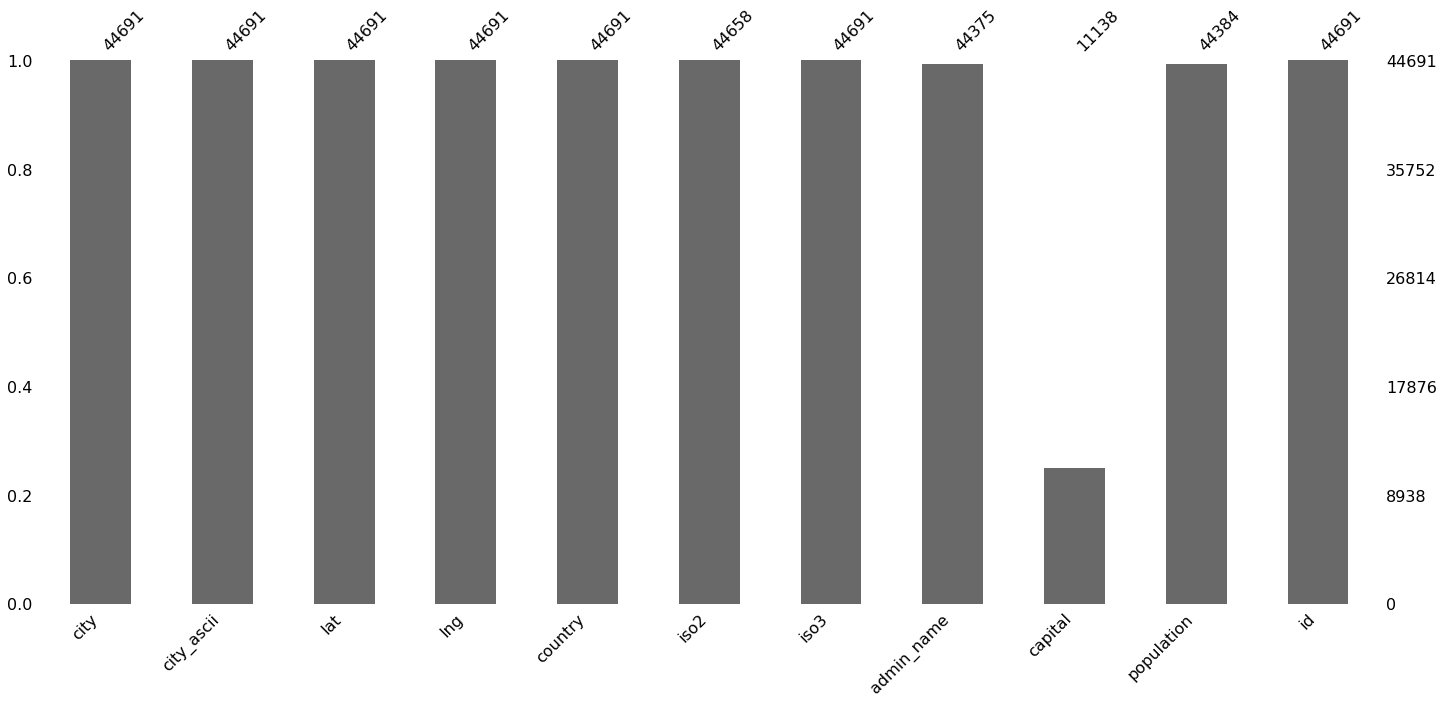

In [13]:
# Displaying Null Values in DF
msng.bar(world_cities)

In [14]:
# Display Job Titles Dataset
job_titles

,Job Titles
0,1st grade teacher
1,1st pressman
2,1st pressman on web press
3,21 dealer
4,2nd grade teacher
...,...
73375,zoo veterinarian
73376,z os mainframe systems programmer
73377,zumba instructor
73378,zyglo inspector


<Axes: >

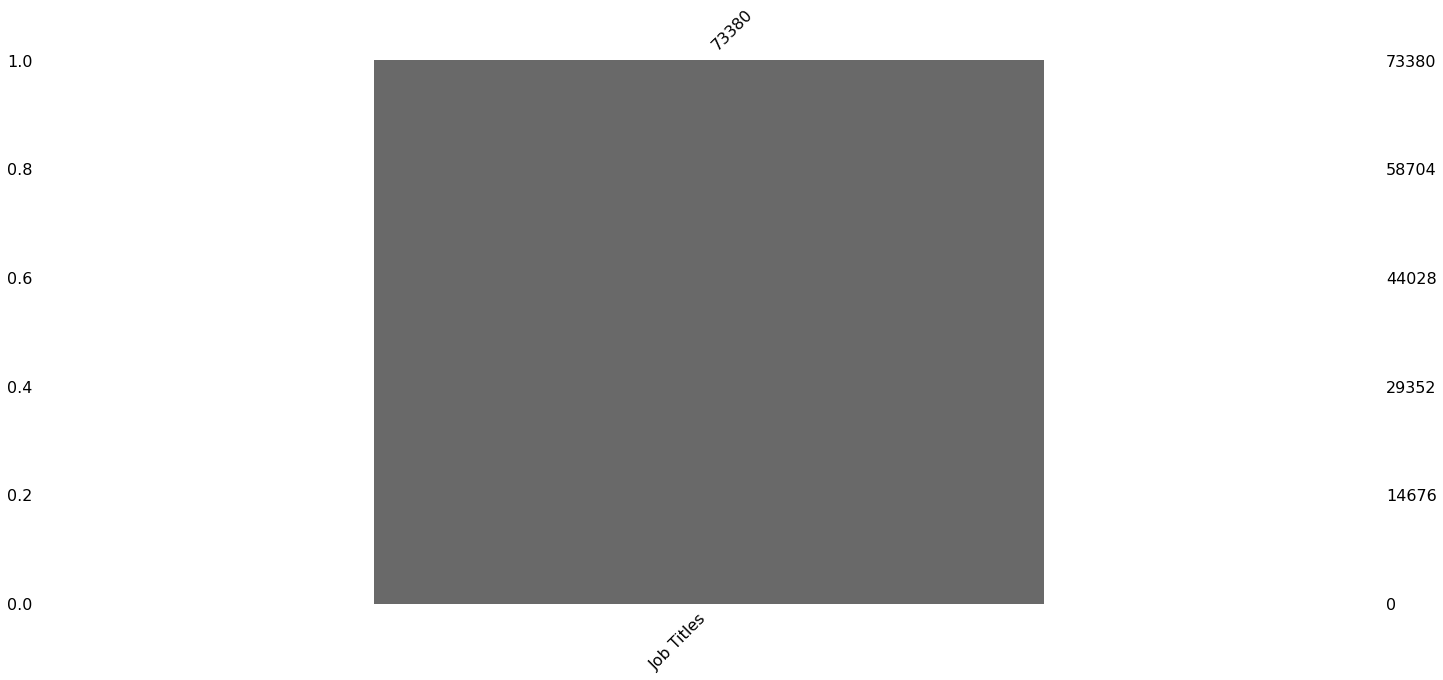

In [15]:
# Displaying Null Values in DF
msng.bar(job_titles)

### Cleaning Job Titles DataSet and CrossReferencing

In [16]:
# Removing Job Titles that are too short
df = df[df.job_title.str.len() >= 3]

# Removing space at start of job titles from GlassDoorReviews
df.job_title = list(map(lambda x: x[1:] if x[0] == ' ' else x, df.job_title))

# Removing space at start of job titles GlassDoorReviews
df.job_title = list(map(lambda x: x[1:] if x[0] == ' ' else x, df.job_title))

# Sorting Job TItles
df.sort_values('job_title',axis=0,inplace=True)



# Removing symbols from job titles in job titles text
job_titles['Job Titles'] = list(map(remove_symbols,job_titles['Job Titles'].values))

# Removing space at start of job titles in job titles text
job_titles['Job Titles'] = list(map(lambda x: x[1:] if x[0] == ' ' else x, job_titles['Job Titles'].values))

# Removing space at start of job titles in job titles text
job_titles['Job Titles'] = list(map(lambda x: x[1:] if x[0] == ' ' else x, job_titles['Job Titles'].values))



# Removing Entires from GGlass door reviews with Job TItles not i Job Titles Text
df = df[df.job_title.isin(job_titles['Job Titles'].values) == True]

# Resseting Index
df.reset_index(drop=True,inplace=True)

# Displaying Changes
df


<ipython-input-16-33e3f5dc4b85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job_title = list(map(lambda x: x[1:] if x[0] == ' ' else x, df.job_title))
<ipython-input-16-33e3f5dc4b85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job_title = list(map(lambda x: x[1:] if x[0] == ' ' else x, df.job_title))
<ipython-input-16-33e3f5dc4b85>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,...,recommend,ceo_approv,outlook,headline,pros,cons,date_review_Year,Languages_Firms,Languages_Jobs,Languages_Loc
0,mcdonalds,2021-03-18,3d artist,Former Employee,tel aviv,3,3.0,4.0,4.0,4.0,...,Negative,Mild,Mild,my review,good place\r\nnice workers and area,the time I am working is late,2021,en,en,en
1,babcockinternationalgroup,2018-08-14,3d artist,"Current Employee, more than 3 years",milton keynes england england,2,3.0,2.0,1.0,1.0,...,Negative,Mild,Negative,Babcock Learning Solutions,"Excellent 3D Management, Central location to M...",Low morale. Underpaid compared to similar role...,2018,en,en,en
2,babcockinternationalgroup,2018-08-30,3d artist,"Former Employee, more than 3 years",milton keynes england england,2,3.0,1.0,1.0,2.0,...,Negative,No Opinion,Mild,3D Role at Babcock,There are not many pro's but here's a few. The...,There are a number of cons..\r\n\r\n- Unable t...,2018,en,en,en
3,jaguarlandrover,2021-02-07,3d artist,Current Employee,milton keynes england england,4,3.0,3.0,2.0,3.0,...,Positive,Positive,Positive,Safe and secure,Good teamwork\r\nMany benefits \r\nAlways have...,There is no further development for 3D artist\...,2021,en,en,en
4,babcockinternationalgroup,2021-02-19,3d artist,Former Employee,london england england,1,4.0,3.0,1.0,2.0,...,Negative,Negative,Negative,Career killer,Slow paced work and ok pay,Career killer and the most boring work,2021,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79860,towerhamletscouncil,2020-12-14,youth worker,"Former Employee, more than 1 year",london england england,2,3.0,1.0,1.0,1.0,...,Negative,Negative,Negative,Lack of direction and drive,There were some engaged colleagues who were pa...,"Nepotism, lack of direction and unwillingness ...",2020,en,en,en
79861,thesalvationarmy,2017-03-09,youth worker,"Former Employee, more than 1 year",bishan new town,1,5.0,1.0,1.0,2.0,...,Negative,Negative,Negative,Youth Worker,Freedom to try new things,Low in salary and lack of management control.,2017,en,en,en
79862,thesalvationarmy,2021-04-17,youth worker,"Former Employee, more than 3 years",singapore,1,1.0,1.0,1.0,1.0,...,Negative,Mild,Negative,Staff for 5 years,"No micromanaging from management, ground staff...",Severe lack of management protocol. As long as...,2021,en,en,en
79863,thesalvationarmy,2021-01-26,youth worker,"Former Employee, more than 1 year",singapore,1,3.0,1.0,1.0,1.0,...,Negative,Mild,Mild,Won't recommend,Building positive relationships with clients,"No growth, toxic environment due to toxic staf...",2021,en,en,en


In [17]:
# Removing countries from locations
df['location'] = [i.split()[0]for i in  df.location]

# Cleaning World City Dataset
world_cities['city'] =  list(map(remove_symbols,world_cities['city'].values))

# Removing Cititesin locations not in world cities dataset
df = df[df.location.isin(world_cities.city.values) == True]

# Displaying Changes
df.head(5)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,...,recommend,ceo_approv,outlook,headline,pros,cons,date_review_Year,Languages_Firms,Languages_Jobs,Languages_Loc
1,babcockinternationalgroup,2018-08-14,3d artist,"Current Employee, more than 3 years",milton,2,3.0,2.0,1.0,1.0,...,Negative,Mild,Negative,Babcock Learning Solutions,"Excellent 3D Management, Central location to M...",Low morale. Underpaid compared to similar role...,2018,en,en,en
2,babcockinternationalgroup,2018-08-30,3d artist,"Former Employee, more than 3 years",milton,2,3.0,1.0,1.0,2.0,...,Negative,No Opinion,Mild,3D Role at Babcock,There are not many pro's but here's a few. The...,There are a number of cons..\r\n\r\n- Unable t...,2018,en,en,en
3,jaguarlandrover,2021-02-07,3d artist,Current Employee,milton,4,3.0,3.0,2.0,3.0,...,Positive,Positive,Positive,Safe and secure,Good teamwork\r\nMany benefits \r\nAlways have...,There is no further development for 3D artist\...,2021,en,en,en
4,babcockinternationalgroup,2021-02-19,3d artist,Former Employee,london,1,4.0,3.0,1.0,2.0,...,Negative,Negative,Negative,Career killer,Slow paced work and ok pay,Career killer and the most boring work,2021,en,en,en
5,mcdonalds,2021-04-30,abattoir manager,"Former Employee, less than 1 year",glasgow,1,4.0,4.0,2.0,1.0,...,Positive,Positive,Positive,Ok,"Slaughterhouse banter, lots of laffs with the ...",I decided to become vegan,2021,en,en,en


# Verifying Data

Here we view summaries of =the dataframes to verify if the column values are apropriate after the data cleaning and we also further verify their null vaues using the msng library again. From what we can see, the null values are not found in any column, the numeric columns retain their 1-5 range of rating, there is now a year column for the year of review, all the sentiment columns have their un encoded values and job titles appear to have appropriate entries.

In [18]:
# Displaying Summary of Numeric Values of Card Data DF
Summary_Numeric(df.select_dtypes(['float64','int64']))[0]

,Columns,Means,Maxes,Minimums,Medians,Unique_Values,Unique_Count,Standard_Devitation
0,overall_rating,3.622432,5.0,1.0,4.0,"[2, 4, 1, 5, 3]",5,1.261553
1,work_life_balance,3.388870,5.0,1.0,4.0,"[3.0, 4.0, 5.0, 1.0, 2.0]",5,1.337922
2,culture_values,3.577108,5.0,1.0,4.0,"[2.0, 1.0, 3.0, 4.0, 5.0]",5,1.372684
3,career_opp,3.425765,5.0,1.0,4.0,"[1.0, 2.0, 4.0, 3.0, 5.0]",5,1.338571
4,comp_benefits,3.390606,5.0,1.0,4.0,"[1.0, 2.0, 3.0, 5.0, 4.0]",5,1.277881
5,senior_mgmt,3.204920,5.0,1.0,3.0,"[3.0, 2.0, 4.0, 1.0, 5.0]",5,1.391879
6,date_review_Year,2018.323451,2021.0,2012.0,2019.0,"[2018, 2021, 2020, 2014, 2016, 2019, 2017, 201...",10,2.408610


In [19]:
# Displaying Summary of Numeric Values of Card Data DF
Summary_Categorical(df.select_dtypes(['object']))[0].head(50)

,Columns,Most_Frequent,Most_Value,Least_Frequent,Least_Value,Unique_Values,Unique_Count
0,firm,pwc,6134,southernhealthandsocialcaretrust,1,"[babcockinternationalgroup, jaguarlandrover, m...",276
1,date_review,2021-01-13,170,2019-10-26,1,"[2018-08-14, 2018-08-30, 2021-02-07, 2021-02-1...",3291
2,job_title,crew member,2661,zone manager,1,"[3d artist, abattoir manager, able seaman, aca...",4157
3,current,"Current Employee, more than 1 year",9570,Former Temporary Employee,1,"[Current Employee, more than 3 years, Former E...",17
4,location,london,14771,glenfield,1,"[milton, london, glasgow, edinburgh, mancheste...",1975
5,recommend,Positive,43389,No Opinion,6383,"[Negative, Positive, No Opinion]",3
6,ceo_approv,Positive,28698,Negative,6507,"[Mild, No Opinion, Positive, Negative]",4
7,outlook,Positive,32828,No Opinion,8338,"[Negative, Mild, Positive, No Opinion]",4
8,headline,Great place to work,1115,Very good place to work and move up,1,"[Babcock Learning Solutions, 3D Role at Babcoc...",41796
9,pros,Great company to work for,45,"Challenging environment, Great executive visio...",1,"[Excellent 3D Management, Central location to ...",66924


<Axes: >

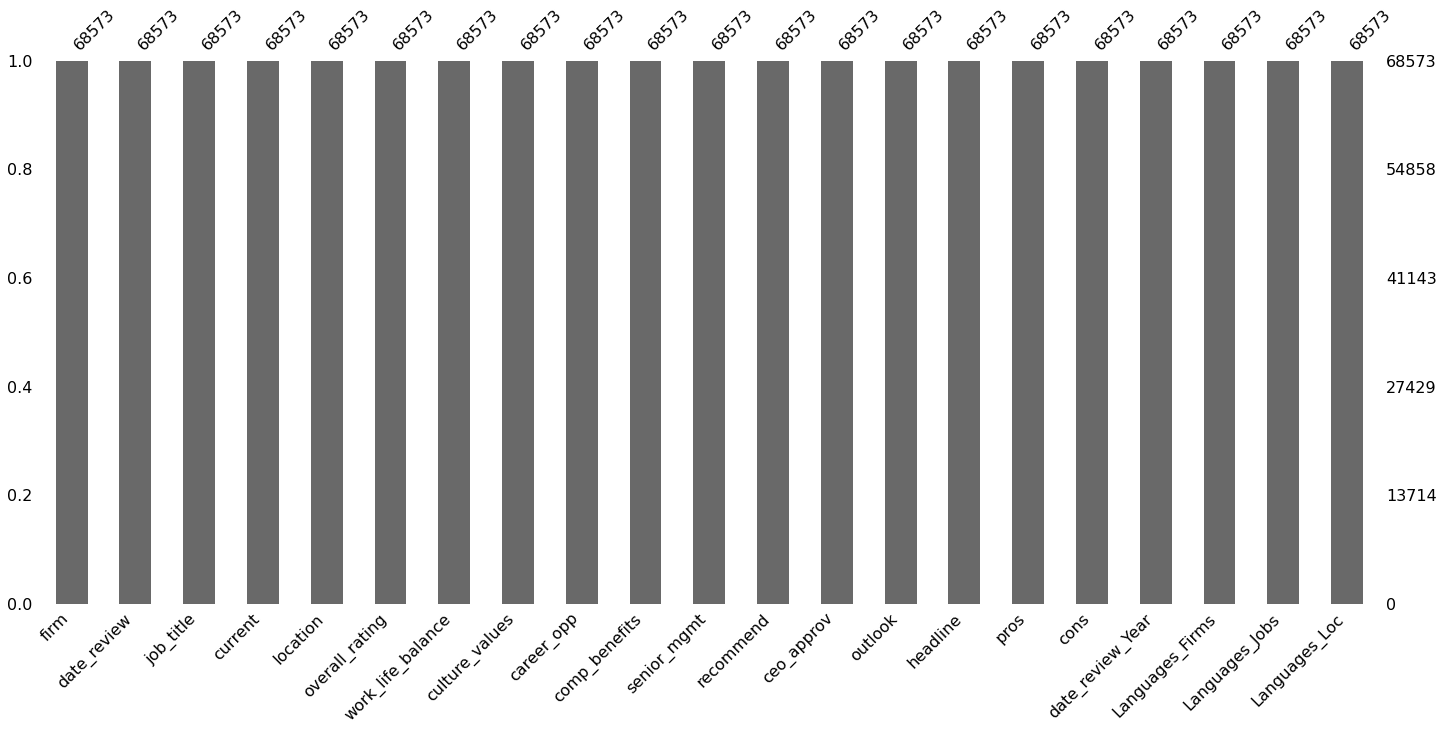

In [20]:
# Displaying Null values of Card Data DF
msng.bar(df)

# Exporting Data

We now export the cleaned data of all dataframes into new csv files

In [21]:
# Creating new file for cleaned creature data
df.to_csv('GlassDoorReviews_Cleaned.csv',index=False)